In [3]:
import mdtraj as mdt
import numpy as np
import matplotlib.pyplot as plt
import nglview

# LAB 2

Converts the pdb file still in pdb file but in the amber format. I think it removes missing residues and not strictly necessary information.
But in general it tells you where are the problems


In [3]:
%cd /home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR SIMULATION/P2

/home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR SIMULATION/P2


In [1]:
! pdb4amber 1fko.pdb > 1fko_amber.pdb


Summary of pdb4amber for: 1fko.pdb

----------Chains
The following (original) chains have been found:
A
B

---------- Alternate Locations (Original Residues!))

The following residues had alternate locations:
None
-----------Non-standard-resnames
CSD, EFZ

---------- Gaps (Renumbered Residues!)
gap of 3.272103 A between LEU 279 and LYS 281
gap of 7.585162 A between PHE 628 and LEU 629
gap of 22.506030 A between GLY 750 and GLU 751

---------- Mising heavy atom(s)

None


In [9]:
view = nglview.show_structure_file("1fko_amber.pdb")
view.clear_representations()
view.add_representation(repr_type='cartoon', selection='protein', color='sstruc')
view.add_representation(repr_type='ball+stick', radius='0.1', selection='water')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ligand')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ion')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

In [4]:
! pdb4amber hiv_rt.pdb > hivrt_amber.pdb


Summary of pdb4amber for: hiv_rt.pdb

----------Chains
The following (original) chains have been found:
A

---------- Alternate Locations (Original Residues!))

The following residues had alternate locations:
None
-----------Non-standard-resnames
CSD

---------- Gaps (Renumbered Residues!)
gap of 3.272103 A between LEU 279 and LYS 281

---------- Mising heavy atom(s)

None


In [5]:
! pdb4amber hivrt_cys.pdb > hivrt_cys_amber.pdb


Summary of pdb4amber for: hivrt_cys.pdb

----------Chains
The following (original) chains have been found:
A

---------- Alternate Locations (Original Residues!))

The following residues had alternate locations:
None
-----------Non-standard-resnames


---------- Mising heavy atom(s)

None


In [7]:
view = nglview.show_structure_file("hivrt_cys_amber.pdb")
view.clear_representations()
view.add_representation(repr_type='cartoon', selection='protein', color='sstruc')
view.add_representation(repr_type='ball+stick', radius='0.1', selection='water')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ligand')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ion')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

First, let's run reduce to add all the hydrogen atoms to the pdb file.

In [3]:
! reduce efz.pdb > efz_new.pdb

reduce: version 3.3 06/02/2016, Copyright 1997-2016, J. Michael Word
Processing file: "efz.pdb"
Database of HETATM connections: "/home/francesco/anaconda3/envs/AmberTools21//dat/reduce_wwPDB_het_dict.txt"
VDW dot density = 16/A^2
Orientation penalty scale = 1 (100%)
Eliminate contacts within 3 bonds.
Ignore atoms with |occupancy| <= 0.01 during adjustments.
Waters ignored if B-Factor >= 40 or |occupancy| < 0.66
Aromatic rings in amino acids accept hydrogen bonds.
Building or keeping OH & SH Hydrogens.
Rotating NH3 Hydrogens.
Not processing Met methyls.
Found 0 hydrogens (0 hets)
Standardized 0 hydrogens (0 hets)
Added 9 hydrogens (9 hets)
Removed 0 hydrogens (0 hets)
If you publish work which uses reduce, please cite:
Word, et. al. (1999) J. Mol. Biol. 285, 1735-1747.
For more information see http://kinemage.biochem.duke.edu


I think it generates the bonds and the charges for the molecule and then it writes them on the .mol2 file. On the sqm.out I think that there are the passages to compute the charges with sqm, and tell you if it converged or not.


Now let's try using antechamber on our EFZ pdb file. To create the "mol2" file, required to define a new unit in LEaP, we simply run the following command:

In [4]:
! antechamber -i efz_new.pdb -fi pdb -o efz.mol2 -fo mol2 -c bcc -s 2


Welcome to antechamber 21.0: molecular input file processor.

acdoctor mode is on: check and diagnose problems in the input file.
The atom type is set to gaff; the options available to the -at flag are
    gaff, gaff2, amber, bcc, and sybyl.
-- Check Format for pdb File --
   Status: pass
Info: Determining atomic numbers from atomic symbols which are case sensitive.
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

Running: /home/francesco/anaconda3/envs/AmberTools21/bin/bondtype -j full -i ANTECHAMBER_BOND_TYPE.AC0 -o ANTECHAMBER_BOND_TYPE.AC -f ac

Running: /home/francesco/anaconda3/envs/AmberTools21/bin/atomtype -i ANTECHAMBER_AC.AC0 -o ANTECHAMBER_AC.AC -p gaff
Info: Total number of electrons: 160; net charge: 0

Runn

Here the -i efz.pdb specifies the name of the 3D structure file and the -fi pdb tells antechamber that this is a pdb format file (we could easily have used any number of other supported formats including Gaussian Z-Matrix [gzmat], Gaussian Output [gout], MDL [mdl], amber Restart [rst], Sybyl Mol2 [mol2]). The -o efz.mol2 specifies the name of our output file and the -fo mol2 states that we want the output file to be of Tripos Mol2 format (this is an internal format supported by LEaP). The -c bcc option tells antechamber to use the AM1-BCC charge model in order to calculate the atomic point charges while the -s 2 option defines the verbosity of the status information provided by antechamber. In this case we have selected verbose output (2).

The files in CAPITALS are all intermediate files used by antechamber and are not required here. You can safely delete them. These files are not deleted by default since they may be of interest if things didn't work correctly. The sqm.xxx files are input and output from the sqm quantum mechanics code used by Antechamber to calculate the atomic point charges. We are not interested in the data here except to check that the sqm calculation completed successfully. In the last line of the sqm.out file we should read:

************* Calculation Completed ************** 

The file that we are really interested in, and the reason we ran Antechamber in the first place, is the efz.mol2 file. This contains the definition of our efz residue including all of the charges and atom types that we will load into LEaP to when creating our prmtop and rst7 files. Let's take a quick look at the file:

<img src="/home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR_SIMULATION/MolecularSimulation/Images/efzmol2.png" width="600">

 As you can see this file contains the 3 dimensional structure of our efz molecule as well as the charge on each atom, final column, the atom number (column 1), its name (column 2) and it's atom type (column 6). It also specifies the bonding at the end of the file. This file does not, however, contain any parameters. The GAFF parameters are all defined in $AMBERHOME/dat/leap/parm/gaff.dat. The other thing you should notice here is that all of the GAFF atom types are in lower case. This is the mechanism by which the GAFF force field is kept independent of the macromolecular AMBER force fields. All of the traditional AMBER force fields use uppercase atom types. In this way the GAFF and traditional force fields can be mixed in the same calculation.

While the most likely combinations of bond, angle and dihedral parameters are defined in the parameter file it is possible that our molecule might contain combinations of atom types for bonds, angles or dihedrals that have not been parameterised. If this is the case then we will have to specify any missing parameters before we can create our prmtop and rst7 files in LEaP.

It contains all the essential components for the force field that are necessary to run tleap. Follows more or less the .mol2 format


We can use the utility parmchk to test if all the parameters we require are available.

In [5]:
! parmchk2 -i efz.mol2 -f mol2 -o efz.frcmod

Run this command now and it will produce a file called efz.frcmod. This is a parameter file that can be loaded into LEaP in order to add missing parameters. Here it will contain all of the missing parameters. If it can antechamber will fill in these missing parameters by analogy to a similar parameter. You should check these parameters carefully before running a simulation. If antechamber can't empirically calculate a value or has no analogy it will either add a default value that it thinks is reasonable or alternatively insert a place holder (with zeros everywhere) and the comment "ATTN: needs revision". In this case you will have to manually parameterise this yourself. It is the hope that as GAFF is developed, the number of missing parameters will decrease. Let's look at our frcmod file:

<img src="/home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR_SIMULATION/MolecularSimulation/Images/efzfrcmod.png" width="800">

We can see that there were a total of 4 missing angle parameters and 4 missing improper dihedrals. For the purposes of this tutorial we shall assume that the parameters Antechamber has suggested for us are acceptable. Ideally you should really test these parameters (by comparing to ab initio calculations for example) to ensure they are reasonable. If you see any parameters listed with the comment "ATTN: NEEDS REVISION" then it means that Antechamber could not determine suitable parameters and so you must manually provide these before you can proceed with the simulation. By default Antechamber will have set the values to zero.

Now we can run the tleap file with a list of commands contained in the *tleap_efz.in* file:
```
source oldff/leaprc.ff99SB
source leaprc.gaff
EFZ = loadmol2 efz.mol2    
list
check EFZ
loadamberparams efz.frcmod
check EFZ
saveoff EFZ efz.lib
saveamberparm EFZ efz.prmtop efz.rst7
quit
```
In order:
1. ensure the GAFF force field is available
2. ensure that it knows about the GAFF force field
3. we can load our efz unit
4. if you now type list in tleap you should see the new EFZ unit
5. at this point we haven't loaded the frcmod file that parmchk gave us. Thus if we check our SUS unit we should find that there are 4 missing angle type parameters.
6. we can now load our frcmod file in order to tell tleap the parameters for these missing angle types
7. if we now check out SUS unit we should find that there are no missing parameters (The output from tleap shows a few warnings, which can be safely ignored in this case due to the triangular bond geometry of sustiva)
8. 
9. we can now create the library file for sustiva (sus.lib), as well as the prmtop and rst7 files (sustiva.prmtop, sustiva.rst7)
10. exit from tleap


In [6]:
! tleap -f tleap_efz.in

-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/prep to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/lib to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd to search path.
-f: Source tleap_efz.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap_efz.in
----- Source: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd/oldff/leaprc.ff99SB
----- Source of /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd/oldff/leaprc.ff99SB done
Log file: ./leap.log
Loading parameters: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm/parm99.dat
Reading title:
PARM99 for DNA,RNA,AA, organic molecules, Polariz.& LP incl.02/04/99
Loading parameters: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm/frcmod.ff99SB
Reading force field modification type file (frcmod)
Reading title:
Modification/update of pa

In [7]:
! cat hivrt_cys.pdb efz.pdb > hivrt_efz.pdb

Pay attention to remove the END at the end of the protein chain becase it is interpreted by leap as the end of the whole molecule. The TER it's not relevant.

In [8]:
# Show protein
view = nglview.show_structure_file("hivrt_efz.pdb")
view.clear_representations()
view.add_representation(repr_type='cartoon', selection='protein', color='sstruc')
view.add_representation(repr_type='ball+stick', radius='0.1', selection='water')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ligand')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ion')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

Then you do the same procedure you used with the substrate efz for the entire complex, protein+substrate. The input file is now *tleap_protefz.in*:

```
source oldff/leaprc.ff99SB
source leaprc.gaff 
loadamberparams efz.frcmod
loadoff efz.lib
hivcompl = loadpdb hivrt_efz.pdb
saveamberparm hivcompl hivrt_efz.prmtop hivrt_efz.rst7
savepdb hivcompl hivrt_efz_amber.pdb
quit

```


In [8]:
! tleap -f tleap_protefz.in

-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/prep to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/lib to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd to search path.
-f: Source tleap_protefz.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap_protefz.in
----- Source: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd/oldff/leaprc.ff99SB
----- Source of /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd/oldff/leaprc.ff99SB done
Log file: ./leap.log
Loading parameters: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm/parm99.dat
Reading title:
PARM99 for DNA,RNA,AA, organic molecules, Polariz.& LP incl.02/04/99
Loading parameters: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm/frcmod.ff99SB
Reading force field modification type file (frcmod)
Reading title:
Modification/upda

## Minimization

Once we have the topology and coordinate files of RT-Sustiva complex, we are ready to run short GB simulations on Sustiva-RT. Note, the procedure given here is very short in order to make the simulations compatible with the timescale of this tutorial. In a real "production" simulation you would typically run a much longer simulation (ns) in order to obtain good statistical convergence.

First, we will minimize our complex to remove any possible bad contacts. Here's our input file min.in. We will do a total of 200 steps of minimization (MAXCYC) with the first 50 being steepest descent (NCYC), the remainder will be conjugate gradient (MAXCYC-NCYC). We will use a reasonably large cut off of 16 Angstroms since this is not going to be a periodic simulation and we want to deal with our electrostatics accurately (NTB=0,CUT=16). For our implicit solvent model we will use the GB model of Hawkins, Cramer and Truhlar, see the AMBER manual for a full description (IGB=1). The input file *min_1.in* consists in:

```
cat > mdin <<EOF
 &cntrl 
   imin=1, maxcyc=100, ncyc=50, cut=16, ntb=0, igb=1,
 /
EOF

set output = minout

```

In [31]:
! sander -O -i min_1.in -o hivrt_efz_min.out -p hivrt_efz.prmtop -c hivrt_efz.rst7  -r hivrt_efz_min.ncrst

If you we add a & at the end of the command, the program will run in the background (this can be done only on the terminal and not in a jupyter notebook)

In [17]:
! grep -A1 " ENERGY " hivrt_efz_min.out | grep -v " ENERGY " | grep " "| awk '{print$1,$2}' > min_an/energy.dat 
! grep -A1 " GMAX " hivrt_efz_min.out | grep -v " GMAX " | grep " "| awk '{print$1,$4}' > min_an/gmax.dat 

In [18]:
sum_energ_min = np.loadtxt("min_an/energy.dat")
sum_gmax_min = np.loadtxt("min_an/gmax.dat")

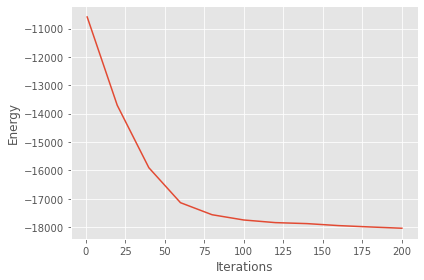

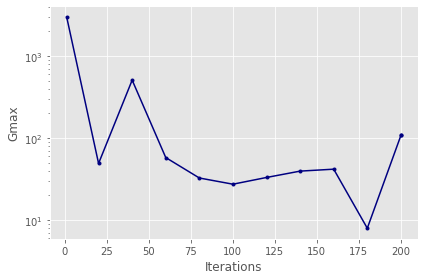

In [21]:
with plt.style.context("ggplot"):
    plt.plot(sum_energ_min[:,0], sum_energ_min[:,1])
    plt.xlabel("Iterations")
    plt.ylabel("Energy")
    plt.tight_layout()
plt.show()

with plt.style.context("ggplot"):
    plt.semilogy(sum_gmax_min[:,0], sum_gmax_min[:,1], ".-", color="navy")
    plt.xlabel("Iterations")
    plt.ylabel("Gmax")
    plt.tight_layout()
plt.show()

# LAB 3

## 6. Generating an environment: solvent, ions

In [1]:
%cd /home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR SIMULATION/P3

[Errno 2] No such file or directory: '/home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR SIMULATION/P3'
/home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR_SIMULATION


The input file is *tleap_protefz.in*:

```
source oldff/leaprc.ff99SB
source leaprc.gaff 
loadamberparams efz.frcmod
loadoff efz.lib
hivcompl = loadpdb hivrt_efz.pdb
addIons hivcompl Cl- 2
source leaprc.water.tip3p
solvatebox hivcompl TIP3PBOX 10.0
saveamberparm hivcompl hivrt_efz_solv.prmtop hivrt_efz_solv.rst7
savepdb hivcompl hivrt_efz_solv.pdb
quit
```
In order:

1. 
2. 
3. 
4. 
5. 
6. add ions to neutralize
7. load the water model. Always be sure that is compatible with our system (check the library and articles related)
8. solvate in the cubuc box
9. 
10. 

In [5]:
! tleap -f tleap_protefz_solv.in

-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/prep to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/lib to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm to search path.
-I: Adding /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd to search path.
-f: Source tleap_protefz_solv.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap_protefz_solv.in
----- Source: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd/oldff/leaprc.ff99SB
----- Source of /home/francesco/anaconda3/envs/AmberTools21/dat/leap/cmd/oldff/leaprc.ff99SB done
Log file: ./leap.log
Loading parameters: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm/parm99.dat
Reading title:
PARM99 for DNA,RNA,AA, organic molecules, Polariz.& LP incl.02/04/99
Loading parameters: /home/francesco/anaconda3/envs/AmberTools21/dat/leap/parm/frcmod.ff99SB
Reading force field modification type file (frcmod)
Reading title:
Modific

In [16]:
view = nglview.show_structure_file("hivrt_efz_solv.pdb")
view.clear_representations()
view.add_representation(repr_type='cartoon', selection='protein', color='sstruc')
view.add_representation(repr_type='ball+stick', radius='0.05', selection='water')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ligand')
view.add_representation(repr_type='ball+stick', radius='0.5', selection='ion')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

## SHORT MD WITHOUT WATER

We already did the optimization passage in the previous lesson. Now we want to first heat up the complex and then run the the proper MD.

### Heating

The next step if to heat the hivrt_efz complex. For speed we will do this very rapidly over 1ps. Ideally you should do this for much longer.

Here's our input file, we will run MD (imin=0) and this is not a restart (irest=0). In this example we will not use shake since it is possible that the hydrogen motion may effect the binding energy (probably not, but it serves as an example here). As we are not using shake we will need a time step smaller than normal. Here I will use a time step of 1 fs and run for 1000 steps [2 ps] (dt = 0.001, nstlim=1000, ntc=1). We will also write to our output file every 20 steps and to our trajectory [mdcrd] file every 20 steps (ntpr=20,ntwx=20). For temperature control we will use a Langevin dynamics approach with a collision frequency of 1 ps^-1. We will start our system at 0K and we want a target temperature of 300K (ntt=3, gamma_ln=1.0, tempi=0.0, temp0=300.0). And here's the input file *heat.in*:

```
cat > mdin <<EOF
&cntrl
  imin=0, irest=0,
  nstlim=1000,dt=0.001, ntc=1,
  ntpr=20, ntwx=20,
  cut=16, ntb=0, igb=1,
  ntt=3, gamma_ln=1.0,
  tempi=0.0, temp0=300.0,
 /
EOF

set output = mdout

```

In [47]:
! sander -O -i heat.in -o hivrt_efz_heat.out -p ../P2/hivrt_efz.prmtop -c ../P2/hivrt_efz_min.ncrst  -r hivrt_efz_heat.rst -x hivrt_efz_heat.nc

Explanations of the parameters above:
* **nstlim**=1000 number of steps
* **dt**=0.001 timestep 1fs (depends on the constraints)
* **ntpr**=20 writing frequency of the output file (energies)
* **ntwx**=20 writing frequency of the trajectory file
* **cut**=16 cutoff (in Angstrom)
* **ntb**=0 no periodic boundary (PBC)
* **igb**=1 implicit solvent
* **ntt**=3 Langevin dynamics
* **gamma_ln**=1 collision frequency 1ps^-1
* **tempi**=0.0 start temperature
* **tempi**=300 target temperature

Generating summary files for quantities contained in *hivrt_efz_heat.out*

In [48]:
%cd heat_an
! $AMBERHOME/bin/process_mdout.perl ../hivrt_efz_heat.out
%cd ..
! pwd

/home/francesco/Scrivania/PDF LEZIONI 2021-22/MOLECULAR SIMULATION/P3/heat_an
Processing sander output file (../hivrt_efz_heat.out)...
Starting output...
Outputing summary.TEMP
Outputing summary_avg.TEMP
Outputing summary_rms.TEMP
Outputing summary.TSOLUTE
Outputing summary_avg.TSOLUTE
Outputing summary_rms.TSOLUTE
Outputing summary.TSOLVENT
Outputing summary_avg.TSOLVENT
Outputing summary_rms.TSOLVENT
Outputing summary.PRES
Outputing summary_avg.PRES
Outputing summary_rms.PRES
Outputing summary.EKCMT
Outputing summary_avg.EKCMT
Outputing summary_rms.EKCMT
Outputing summary.ETOT
Outputing summary_avg.ETOT
Outputing summary_rms.ETOT
Outputing summary.EKTOT
Outputing summary_avg.EKTOT
Outputing summary_rms.EKTOT
Outputing summary.EPTOT
Outputing summary_avg.EPTOT
Outputing summary_rms.EPTOT
Outputing summary.DENSITY
Outputing summary_avg.DENSITY
Outputing summary_rms.DENSITY
Outputing summary.VOLUME
Outputing summary_avg.VOLUME
Outputing summary_rms.VOLUME
Outputing summary.ESCF
Outputin

In [49]:
sum_energ=np.loadtxt('heat_an/summary.ETOT')
sum_temp=np.loadtxt('heat_an/summary.TEMP')

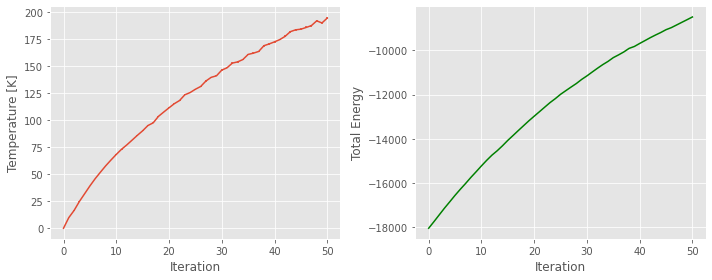

In [64]:
with plt.style.context("ggplot"):
    _, ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].errorbar(np.arange(len(sum_temp)),sum_temp[:,1], sum_temp[:,0])
    ax[0].set_xlabel("Iteration")
    ax[0].set_ylabel("Temperature [K]")
    ax[1].plot(sum_energ[:,1], color="g")
    ax[1].set_xlabel("Iteration")
    ax[1].set_ylabel("Total Energy")
    plt.tight_layout()

The heating trajectory and restart coordinates are  saved in 1FKO_sus_eq.nc and 1FKO_sus_eq.rst, respectively. Now that the sustiva-RT complex is minimized and heated, you can take a look at the snapshot at 300K. This structure can be used as the starting point for further equilibration.

### Molecular dynamics

*md.in*:

```
cat > mdin <<EOF
&cntrl
  imin=0, irest=1, ntx=5,
  nstlim=100,dt=0.001, ntc=2,
  ntpr=20, ntwx=20, ntwr=20,
  cut=16, ntb=0, igb=1,
  ntt=0, temp0=300.0,
 /
EOF
```

In [51]:
! sander -O -i md.in -o hivrt_efz_md.out -p ../P2/hivrt_efz.prmtop -c hivrt_efz_heat.rst  -r hivrt_efz_md.rst -x hivrt_efz_md.nc 

In [78]:
t = mdt.load("hivrt_efz_md.nc", top="../P2/hivrt_efz.prmtop")
prot = t.atom_slice(t.topology.select("protein"))
efz = t.atom_slice(t.topology.select("resname EFZ"))

In [56]:
rmsd_prot = np.array([mdt.rmsd(prot,prot[i]) for i in range(len(prot))])

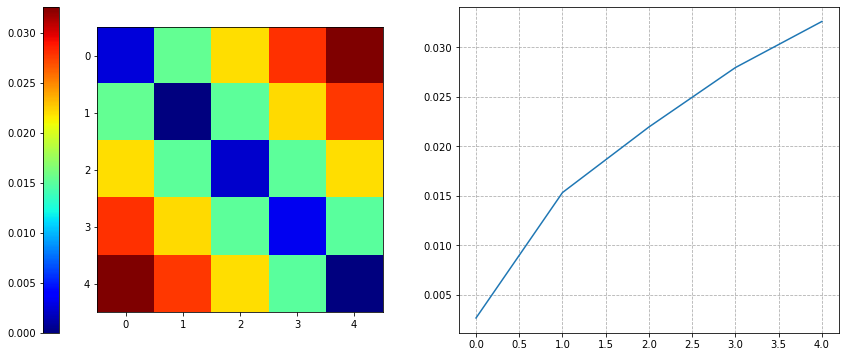

In [74]:
fig, ax_rmsd = plt.subplots(1,2,figsize=(15,6))
g1 = ax_rmsd[0].imshow(rmsd_prot, cmap="jet")
fig.colorbar(g1, ax=ax_rmsd[0],location="left")
ax_rmsd[1].plot(rmsd_prot[:,0])
ax_rmsd[1].grid(linestyle="--")

## SETTING UP MD WITH PERIODIC BOUNDARY CONDITIONS (PBC)

### Minimization with PBC

If we want to run a MD wth PBC it's necessary to also do the MM first minimization in the same fashion. The input file for the sander run is **:

*min_pbc.in*:
```
cat > mdin <<EOF
&cntrl
  imin   = 1,
  maxcyc = 20,
  ncyc   = 10,
  ntb    = 1,
  ntr    = 0,
  cut    = 10.0
 /
EOF

set output = minout
```

In [ ]:
! sander -O -i min_pbc.in -o hivrt_efz_minsolv.out -p hivrt_efz_solv.prmtop -c hivrt_efz_solv.rst7  -r hivrt_efz_minsolv.ncrst

### Heating with PBC

The input file *heat_pbc.in* is:

```
cat > mdin <<EOF
 &cntrl
  imin   = 0,
  irest  = 0,
  ntx    = 1,
  ntb    = 1,
  cut    = 10.0,
  ntr    = 0,
  ntc    = 2,
  ntf    = 2,
  tempi  = 0.0,
  temp0  = 300.0,
  ntt    = 3,
  gamma_ln = 1.0,
  nstlim = 10000, dt = 0.002
  ntpr = 100, ntwx = 100, ntwr = 1000
 /
EOF

set output = mdout
```

In [ ]:
! sander -O -i heat_pbc.in -o hivrt_efz_heatpbc.out -p hivrt_efz_solv.prmtop -c hivrt_efz_minsolv.ncrst  -r hivrt_efz_heatpbc.rst -x hivrt_efz_heatpbc.nc

Checking final coordinates

In [ ]:
! ambpdb -p hivrt_efz.prmtop -c hivrt_efz_md.ncrst > hivrt_efz_md.pdb

Suggestion for a good run:
1. **MINIMIZATION**: first minimize the protein in order for it to behave properly (up to when??? some indicators)
2. be aware of eventual **charges** and fix them by adding ions (automatically with leap or even manually directly on the PDB file). If not done in some FF this could lead to the disintegration of the molecule
3. **HEATING**: run a first MD without velocities (assigned randomlly) to reach the desired temperature
4. **MOLECULAR DYNAMICS**: when this is reached (make sure of it), you can start the proper MD **without reassigning the velocities** (they are properly assigned after the heating phase) until you reach an equilibrium
    * if you reassing the velocities you could assign to particular areas large forces that could have strange effects
    * better wait until we reach the equilibrium and maybe form that point on try to reassing the volecities in order to explore different directions

# MD parameters

Let’s list the parameters and their meaning:
* min  
    * 0: Choose a molecular dynamics (MD) run [no minimization] [MD]
    * 1: Choose a minimization run [MIN]
* ntx
    * 1: Initial file contains coordinates, but no velocities. [MIN]
    * 5: Read coordinates and velocities from unformatted rst7 coordinate file (coordinates available)
* irest (you want to use the velocities you generated, if you have, use them)
    * 0: Do not restart the simulation. (restart is not applicable to minimization) [MIN]
    * 1: Restart previous MD run [This means velocities are expected in the rst7 file and will be used to provide initial atom velocities] [MD]
* maxcyc: Maximum minimization cycles [MIN]
* ncyc: The steepest descent algorithm for the first 0-ncyc cycles, then switches the conjugate gradient algorithm for ncyc-maxcyc cycles [MIN]
* ntpr: Print to the Amber mdout output file every ntpr cycles [MIN]
* ntwx: No Amber mdcrd trajectory file written (not applicable to minimization)
* cut: Nonbonded cutoff distance in Angstroms (for PME, limit of the direct space sum - do NOT reduce this below 8.0. Higher numbers give slightly better accuracy but at vastly increased computational cost.)
* nstlim: Number of MD steps in run (nstlim * dt = run length in ps) [MD]
* dt: Time step in picoseconds (ps). The time length of each MD step [MD]
* ntf: Setting to not calculate force for SHAKE constrained bonds [MD]

CONSTRAINTS:
* ilbelly: belly type dynamics
    * 1: a subset of the atoms in the system will be allowed to move, and the coordinates of the rest will be frozen. The moving atoms are specified with bellymask. This option is not available when igb>0. Note that this does not provide any significant speed advantage. Most applications should use the ntr variable instead to restrain parts of the system to stay close to some initial configuration.
* bellymask: string that specifies the moving atoms when ibelly=1.
* ntc: SHAKE keep some bonds fixed and some other not (like bonds with hydrogens, not really important, we can keep them fixed for all the simulation) [MD]
    * 1: no
    * 2: only H
    * 3: all bonds
* ntr: (ideally you would like to deleate these constraints at the end of the simulation, but tipically you have to keep them for a long time in order to arrive to a good equilibration)
    * 1: harmonic restraint, I constrain the positions around the current strucutre, assign to each atom position an harmonic potential
* restraint_wt: orce constant for harminc restraints

In case ntr > 0 the constraint specification is in a separate section (keep track of them in order to undesrtand the results)
```
/
keep EFZ fix         [these are the specifications to tell the program what to keep fixed]
500.0                [force constant very high, almost fixed]
RES 544 544          [in general here you put the specification for the restraints]
END
END
```

* ntwx: Write Amber trajectory file mdcrd every ntwx steps [MD]
* ntb
    * 1: Periodic boundaries for constant volume [MD]
* ntp
    * 0: No pressure control [MD]

TEMPERATURE
* ntt
    * 0: pure Newtonian dynamics
    * 1: Berendsen temperature coupling scheme
    * 2: Andreson thermostat
    * 3: Temperature control with Langevin thermostat [MD]
* gamma_ln: Langevin thermostat collision frequency [MD]
* tempi: Initial thermostat temperature in K (see NMROPT section) [MD]
* temp0: Final thermostat temperature in K (see NMROPT section) [MD]
* nmropt
    * 1: NMR restraints and weight changes read (see NMROPT section) [MD]
* ig:
    * -1: Randomize the seed for the pseudo-random number generator [always a good idea unless you are debugging a simulation problem] [MD]


# LAB 4

In [1]:
%cd /home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR_SIMULATION/P4

/home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR_SIMULATION/P4


## Minimise with EFZ gradually releasing the constraints

*min_1.in*:

```
cat > mdin <<EOF
 &cntrl 
   imin=1, 
   maxcyc=1000, 
   ncyc=250, 
   cut=12, 
   ntb=0, 
   igb=1,
   ntr=1,
 /
keep EFZ fix
500.0
RES 544 544
END
END
EOF

set output = minout

```

In [2]:
! sander -O -i min1.in -o hivcompl_min.out -p hivcompl.prmtop -c hivcompl.rst7  -r hivcompl_min.ncrst -ref hivcompl.rst7

*min_2.in*:

```
cat > mdin <<EOF
 &cntrl 
   imin=1, 
   maxcyc=500, 
   ncyc=50, 
   cut=12, 
   ntb=0, 
   igb=1,
   ntr=1,
 /
keep EFZ fix
50.0
RES 544 544
END
END
EOF

set output = minout

```

In [ ]:
! sander -O -i min2.in -o hivcompl_min2.out -p hivcompl.prmtop -c hivcompl_min.ncrst  -r hivcompl_min2.ncrst -ref hivcompl.rst7

*min_3.in*:

```
cat > mdin <<EOF
 &cntrl 
   imin=1, 
   maxcyc=500, 
   ncyc=50, 
   cut=12, 
   ntb=0, 
   igb=1,
   ntr=1,
 /
keep EFZ fix
5.0
RES 544 544
END
END
EOF

set output = minout

```

In [ ]:
! sander -O -i min3.in -o hivcompl_min3.out -p hivcompl.prmtop -c hivcompl_min2.ncrst  -r hivcompl_min3.ncrst -ref hivcompl.rst7

*min_4.in*:

```
cat > mdin <<EOF
 &cntrl 
   imin=1, 
   maxcyc=500, 
   ncyc=50, 
   cut=12, 
   ntb=0, 
   igb=1,
   ntr=0,
 /
EOF

set output = minout

```

In [ ]:
! sander -O -i min4.in -o hivcompl_min4.out -p hivcompl.prmtop -c hivcompl_min3.ncrst  -r hivcompl_min4.ncrst

*min_5.in*:

```
cat > mdin <<EOF
 &cntrl 
   imin=1, 
   maxcyc=2500, 
   ncyc=250, 
   cut=10, 
   ntb=0, 
   igb=1,
   ntr=0,
 /
EOF

set output = minout

```

In [ ]:
! sander -O -i min5.in -o hivcompl_min5.out -p hivcompl.prmtop -c hivcompl_min4.ncrst  -r hivcompl_min5.ncrst

In [56]:
#ENERGY
! grep -A1 " ENERGY " hivcompl_min.out | grep -v " ENERGY " | grep " "| awk '{print$1,$2}' > min_an/energ_min1.dat
! grep -A1 " ENERGY " hivcompl_min2.out | grep -v " ENERGY " | grep " "| awk '{print$1,$2}' > min_an/energ_min2.dat
! grep -A1 " ENERGY " hivcompl_min3.out | grep -v " ENERGY " | grep " "| awk '{print$1,$2}' > min_an/energ_min3.dat
! grep -A1 " ENERGY " hivcompl_min2.out | grep -v " ENERGY " | grep " "| awk '{print$1,$2}' > min_an/energ_min4.dat
! grep -A1 " ENERGY " hivcompl_min5.out | grep -v " ENERGY " | grep " "| awk '{print$1,$2}' > min_an/energ_min5.dat

#GMAX
! grep -A1 " GMAX " hivcompl_min.out | grep -v " GMAX " | grep " "| awk '{print$1,$4}' > min_an/gmax_min1.dat
! grep -A1 " GMAX " hivcompl_min2.out | grep -v " GMAX " | grep " "| awk '{print$1,$4}' > min_an/gmax_min2.dat
! grep -A1 " GMAX " hivcompl_min3.out | grep -v " GMAX " | grep " "| awk '{print$1,$4}' > min_an/gmax_min3.dat
! grep -A1 " GMAX " hivcompl_min4.out | grep -v " GMAX " | grep " "| awk '{print$1,$4}' > min_an/gmax_min4.dat
! grep -A1 " GMAX " hivcompl_min5.out | grep -v " GMAX " | grep " "| awk '{print$1,$4}' > min_an/gmax_min5.dat

#RMS
! grep -A1 " RMS" hivcompl_min.out | grep -v " RMS" | grep " "| awk '{print$1,$3}' > min_an/rms_min1.dat
! grep -A1 " RMS" hivcompl_min2.out | grep -v " RMS" | grep " "| awk '{print$1,$3}' > min_an/rms_min2.dat
! grep -A1 " RMS" hivcompl_min3.out | grep -v " RMS" | grep " "| awk '{print$1,$3}' > min_an/rms_min3.dat
! grep -A1 " RMS" hivcompl_min4.out | grep -v " RMS" | grep " "| awk '{print$1,$3}' > min_an/rms_min4.dat
! grep -A1 " RMS" hivcompl_min5.out | grep -v " RMS" | grep " "| awk '{print$1,$3}' > min_an/rms_min5.dat

In [57]:
l4_min_gmax = []
for i in [1,2,3,4,5]:
    l4_min_gmax.append(np.loadtxt("min_an/gmax_min%d.dat" % (i)))

l4_min_energ = []
for i in [1,2,3,4,5]:
    l4_min_energ.append(np.loadtxt("min_an/energ_min%d.dat" % (i)))

l4_min_rms = []
for i in [1,2,3,4,5]:
    l4_min_rms.append(np.loadtxt("min_an/rms_min%d.dat" % (i)))

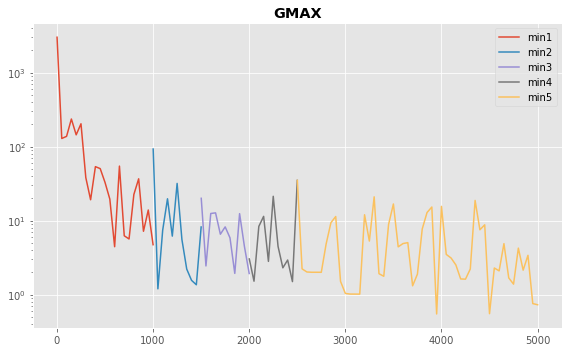

In [60]:
with plt.style.context("ggplot"):
    plt.figure(figsize=(8,5))
    for i in range(5):
        if i==0:
            bias = 0
        else:
            bias += l4_min_gmax[i-1][-1,0]
        plt.semilogy(l4_min_gmax[i][:,0]+bias,l4_min_gmax[i][:,1], label="min"+str(i+1))
    plt.legend()
    plt.title("GMAX", fontweight="bold")
    plt.tight_layout()
    plt.show()

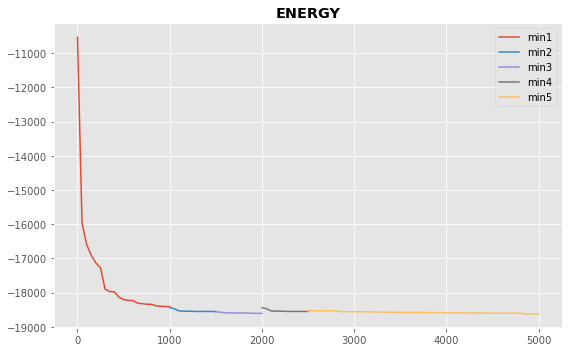

In [61]:
with plt.style.context("ggplot"):
    plt.figure(figsize=(8,5))
    for i in range(5):
        if i==0:
            bias = 0
        else:
            bias += l4_min_energ[i-1][-1,0]
        plt.plot(l4_min_energ[i][:,0]+bias,l4_min_energ[i][:,1], label="min"+str(i+1))
    plt.legend()
    plt.title("ENERGY", fontweight="bold")
    plt.tight_layout()
    plt.show()

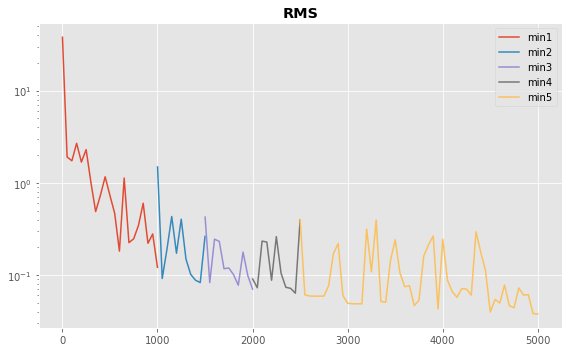

In [62]:
with plt.style.context("ggplot"):
    plt.figure(figsize=(8,5))
    for i in range(5):
        if i==0:
            bias = 0
        else:
            bias += l4_min_rms[i-1][-1,0]
        plt.semilogy(l4_min_rms[i][:,0]+bias,l4_min_rms[i][:,1], label="min"+str(i+1))
    plt.legend()
    plt.title("RMS", fontweight="bold")
    plt.tight_layout()
    plt.show()

## Heating with SHAKE

**NOTE: with implicit solvent do not use short cutoffs!**

In heating set collision frequency high (up to 1000 ps-1 )

*heat.in*:

```
cat > mdin <<EOF
&cntrl
  imin=0, irest=0,
  nstlim=2500,dt=0.001,
  ntpr=50, ntwx=50,
  cut=10, ntb=0, igb=1,
  ntt=3, gamma_ln=500,
  tempi=0.0, temp0=300.0,
  ntc=2,ntf=2,
 /
EOF

set output = mdout
```

In [ ]:
! sander -O -i heat.in -o hivrtcompl_heat1.out -p hivcompl.prmtop -c hivcompl_min5.ncrst  -r hivcompl_heat1.rst -x hivcompl_heat1.nc -ref hivcompl_min5.ncrst

## MD decreasing coupling to temperature ‘bath’

*md_1.in*:

```
cat > mdin <<EOF
&cntrl
  imin=0, irest=1, ntx=5,
  nstlim=1000,dt=0.001, 
  ntpr=50, ntwx=50, ntwr=50,
  cut=10, ntb=0, igb=1,
  ntt=3, gamma_ln=250, temp0=300.0,
  ntc=2, ntf=2,
 /
EOF

set output = mdout

```

For the other MD we reduce the value of the water collision frequency of tha Langevin thermostat:

* *md_2*: gamma_ln = 100
* *md_3*: gamma_ln = 50
* *md_4*: gamma_ln = 5
* *md_5*: gamma_ln = 5

For the last MD (*md_5.in*), we also increase the time interval *dt* from 0.001 to 0.002, in order to sample a larger time interval.

In [3]:
! sander -O -i md_1.in -o hivrtcompl_md1.out -p hivcompl.prmtop -c hivcompl_md4.rst  -r hivcompl_md1.rst -x hivcompl_md1.rst7 -ref hivcompl_min5.ncrst

# LAB 5

In [65]:
%cd /home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR_SIMULATION/P5/MD-Trajectory-Tutorial-UniPD-2022

/home/francesco/Scrivania/PDF_LEZIONI_2021-22/MOLECULAR_SIMULATION/P5/MD-Trajectory-Tutorial-UniPD-2022


**How to install Plumed:**
```
conda create --name plumed
conda activate plumed
conda install -c conda-forge plumed
```

Chek if everything is ok (no errors should occour)
```
plumed --has-mpi && echo ok
mx_mpi mdrun -h 2> /dev/null | grep -q plumed && echo ok
```

In [67]:
d_com = np.loadtxt("dist_com.dat")

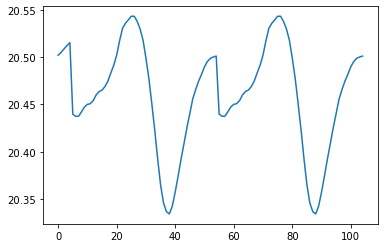

In [68]:
plt.plot(d_com[:,0], d_com[:,1])